# Clear Fork: Porosity & Rock Type  study

## Supervised Learning: Regression & Classification
    
    Features: Log Data, Core Data, & Rock Type Data
   
    Target: estimating Porosity & Rock Type

In [221]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

%matplotlib inline

In [222]:
#Importing Data

ld = pd.read_csv('log_data_all.csv')
ld.head()

,wellName,Depth,GR,fN,rb,PE,Dt,RD,RS,RGRD,Caliper,RSFL,RMLL
0,NRU_1204,6131,37.9,5.2,2.827,3.42,46.5,2063.4,1338.6,NaN,8.86,NaN,NaN
1,NRU_1204,6132,33.6,4.8,2.851,3.59,46.3,3274.2,1907.2,NaN,8.61,NaN,NaN
2,NRU_1204,6133,30.0,4.5,2.853,3.67,47.1,1300.7,1189.6,NaN,8.64,NaN,NaN
3,NRU_1204,6134,39.3,4.8,2.851,3.69,48.5,106.1,183.7,NaN,8.83,NaN,NaN
4,NRU_1204,6135,56.3,6.7,2.783,3.48,56.4,26.2,30.0,NaN,8.68,NaN,NaN


In [223]:
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6863 entries, 0 to 6862
Data columns (total 13 columns):
wellName    6863 non-null object
Depth       6863 non-null int64
GR          6863 non-null float64
fN          6863 non-null float64
rb          6863 non-null float64
PE          6863 non-null float64
Dt          6863 non-null float64
RD          6863 non-null float64
RS          6863 non-null float64
RGRD        1151 non-null float64
Caliper     4575 non-null float64
RSFL        1090 non-null float64
RMLL        2308 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 697.1+ KB


In [224]:
ld.groupby(['wellName']).count()  # inventory of features in each well

,Depth,GR,fN,rb,PE,Dt,RD,RS,RGRD,Caliper,RSFL,RMLL
wellName,,,,,,,,,,,,
NRU_1204,1170,1170,1170,1170,1170,1170,1170,1170,0,1170,0,0
NRU_1509,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151,0,0
NRU_1510,1090,1090,1090,1090,1090,1090,1090,1090,0,1090,1090,0
NRU_207,1144,1144,1144,1144,1144,1144,1144,1144,0,0,0,0
NRU_3319,1164,1164,1164,1164,1164,1164,1164,1164,0,1164,0,1164
NRU_3533,1144,1144,1144,1144,1144,1144,1144,1144,0,0,0,1144


In [225]:
cd = pd.read_csv('core_data_air_all.csv')
cd.head()

,wellName,Depth,Porosity_air,Density_air,kair_air
0,NRU_1510,6148,2.1,2.85,0.02
1,NRU_1510,6149,2.6,2.84,0.02
2,NRU_1510,6150,2.2,2.84,0.01
3,NRU_1510,6151,2.2,2.87,0.01
4,NRU_1510,6152,2.5,2.89,0.01


In [226]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343 entries, 0 to 3342
Data columns (total 5 columns):
wellName        3343 non-null object
Depth           3343 non-null int64
Porosity_air    3233 non-null float64
Density_air     3233 non-null float64
kair_air        3233 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 130.7+ KB


In [227]:
rt = pd.read_csv('rocktypes_cl-1.csv')
rt.head()

,wellName,Depth,Rock Type
0,NRU_1509,6348,2
1,NRU_1509,6349,2
2,NRU_1509,6350,2
3,NRU_1509,6351,2
4,NRU_1509,6352,2


In [228]:
rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 3 columns):
wellName     558 non-null object
Depth        558 non-null int64
Rock Type    558 non-null int64
dtypes: int64(2), object(1)
memory usage: 13.2+ KB


## Exploratory Data Analysis (EDA)

In [229]:
# Merging all three sources of Data

data_cd = pd.merge(ld, cd,  how='inner', on=['wellName','Depth'])

In [230]:
data_cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3186 entries, 0 to 3185
Data columns (total 16 columns):
wellName        3186 non-null object
Depth           3186 non-null int64
GR              3186 non-null float64
fN              3186 non-null float64
rb              3186 non-null float64
PE              3186 non-null float64
Dt              3186 non-null float64
RD              3186 non-null float64
RS              3186 non-null float64
RGRD            752 non-null float64
Caliper         1592 non-null float64
RSFL            680 non-null float64
RMLL            1011 non-null float64
Porosity_air    3076 non-null float64
Density_air     3076 non-null float64
kair_air        3076 non-null float64
dtypes: float64(14), int64(1), object(1)
memory usage: 423.1+ KB


In [231]:
data_cd = data_cd.drop(columns = ['Caliper','RGRD','RSFL','RMLL']) 
data_cd = data_cd.dropna()

In [232]:
data_cd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3076 entries, 0 to 3185
Data columns (total 12 columns):
wellName        3076 non-null object
Depth           3076 non-null int64
GR              3076 non-null float64
fN              3076 non-null float64
rb              3076 non-null float64
PE              3076 non-null float64
Dt              3076 non-null float64
RD              3076 non-null float64
RS              3076 non-null float64
Porosity_air    3076 non-null float64
Density_air     3076 non-null float64
kair_air        3076 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 312.4+ KB


In [233]:
data_rt = pd.merge(ld, rt, how='inner', on=['wellName','Depth'] )

In [234]:

data_rt.shape

(558, 14)

In [235]:
data_cd['wellName'].unique()

array(['NRU_1510', 'NRU_207', 'NRU_3319', 'NRU_3533', 'NRU_1509'],
      dtype=object)

In [236]:
data_rt['wellName'].unique()

array(['NRU_1510', 'NRU_207', 'NRU_3319', 'NRU_3533', 'NRU_1509'],
      dtype=object)

In [237]:
data_cd.shape

(3076, 12)

In [238]:
data_cd.groupby(['wellName']).count()  # inventory of features in each well

,Depth,GR,fN,rb,PE,Dt,RD,RS,Porosity_air,Density_air,kair_air
wellName,,,,,,,,,,,
NRU_1509,729,729,729,729,729,729,729,729,729,729,729
NRU_1510,633,633,633,633,633,633,633,633,633,633,633
NRU_207,743,743,743,743,743,743,743,743,743,743,743
NRU_3319,152,152,152,152,152,152,152,152,152,152,152
NRU_3533,819,819,819,819,819,819,819,819,819,819,819


In [239]:
data_rt = data_rt.drop(columns = ['RGRD','Caliper','RSFL','RMLL']) 
data_rt = data_rt.dropna()

In [240]:
data_rt.shape

(558, 10)

In [241]:
data_rt.groupby(['wellName']).count()  # inventory of features in each well

,Depth,GR,fN,rb,PE,Dt,RD,RS,Rock Type
wellName,,,,,,,,,
NRU_1509,38,38,38,38,38,38,38,38,38
NRU_1510,40,40,40,40,40,40,40,40,40
NRU_207,323,323,323,323,323,323,323,323,323
NRU_3319,40,40,40,40,40,40,40,40,40
NRU_3533,117,117,117,117,117,117,117,117,117


In [242]:
data_cd.columns

Index(['wellName', 'Depth', 'GR', 'fN', 'rb', 'PE', 'Dt', 'RD', 'RS',
       'Porosity_air', 'Density_air', 'kair_air'],
      dtype='object')

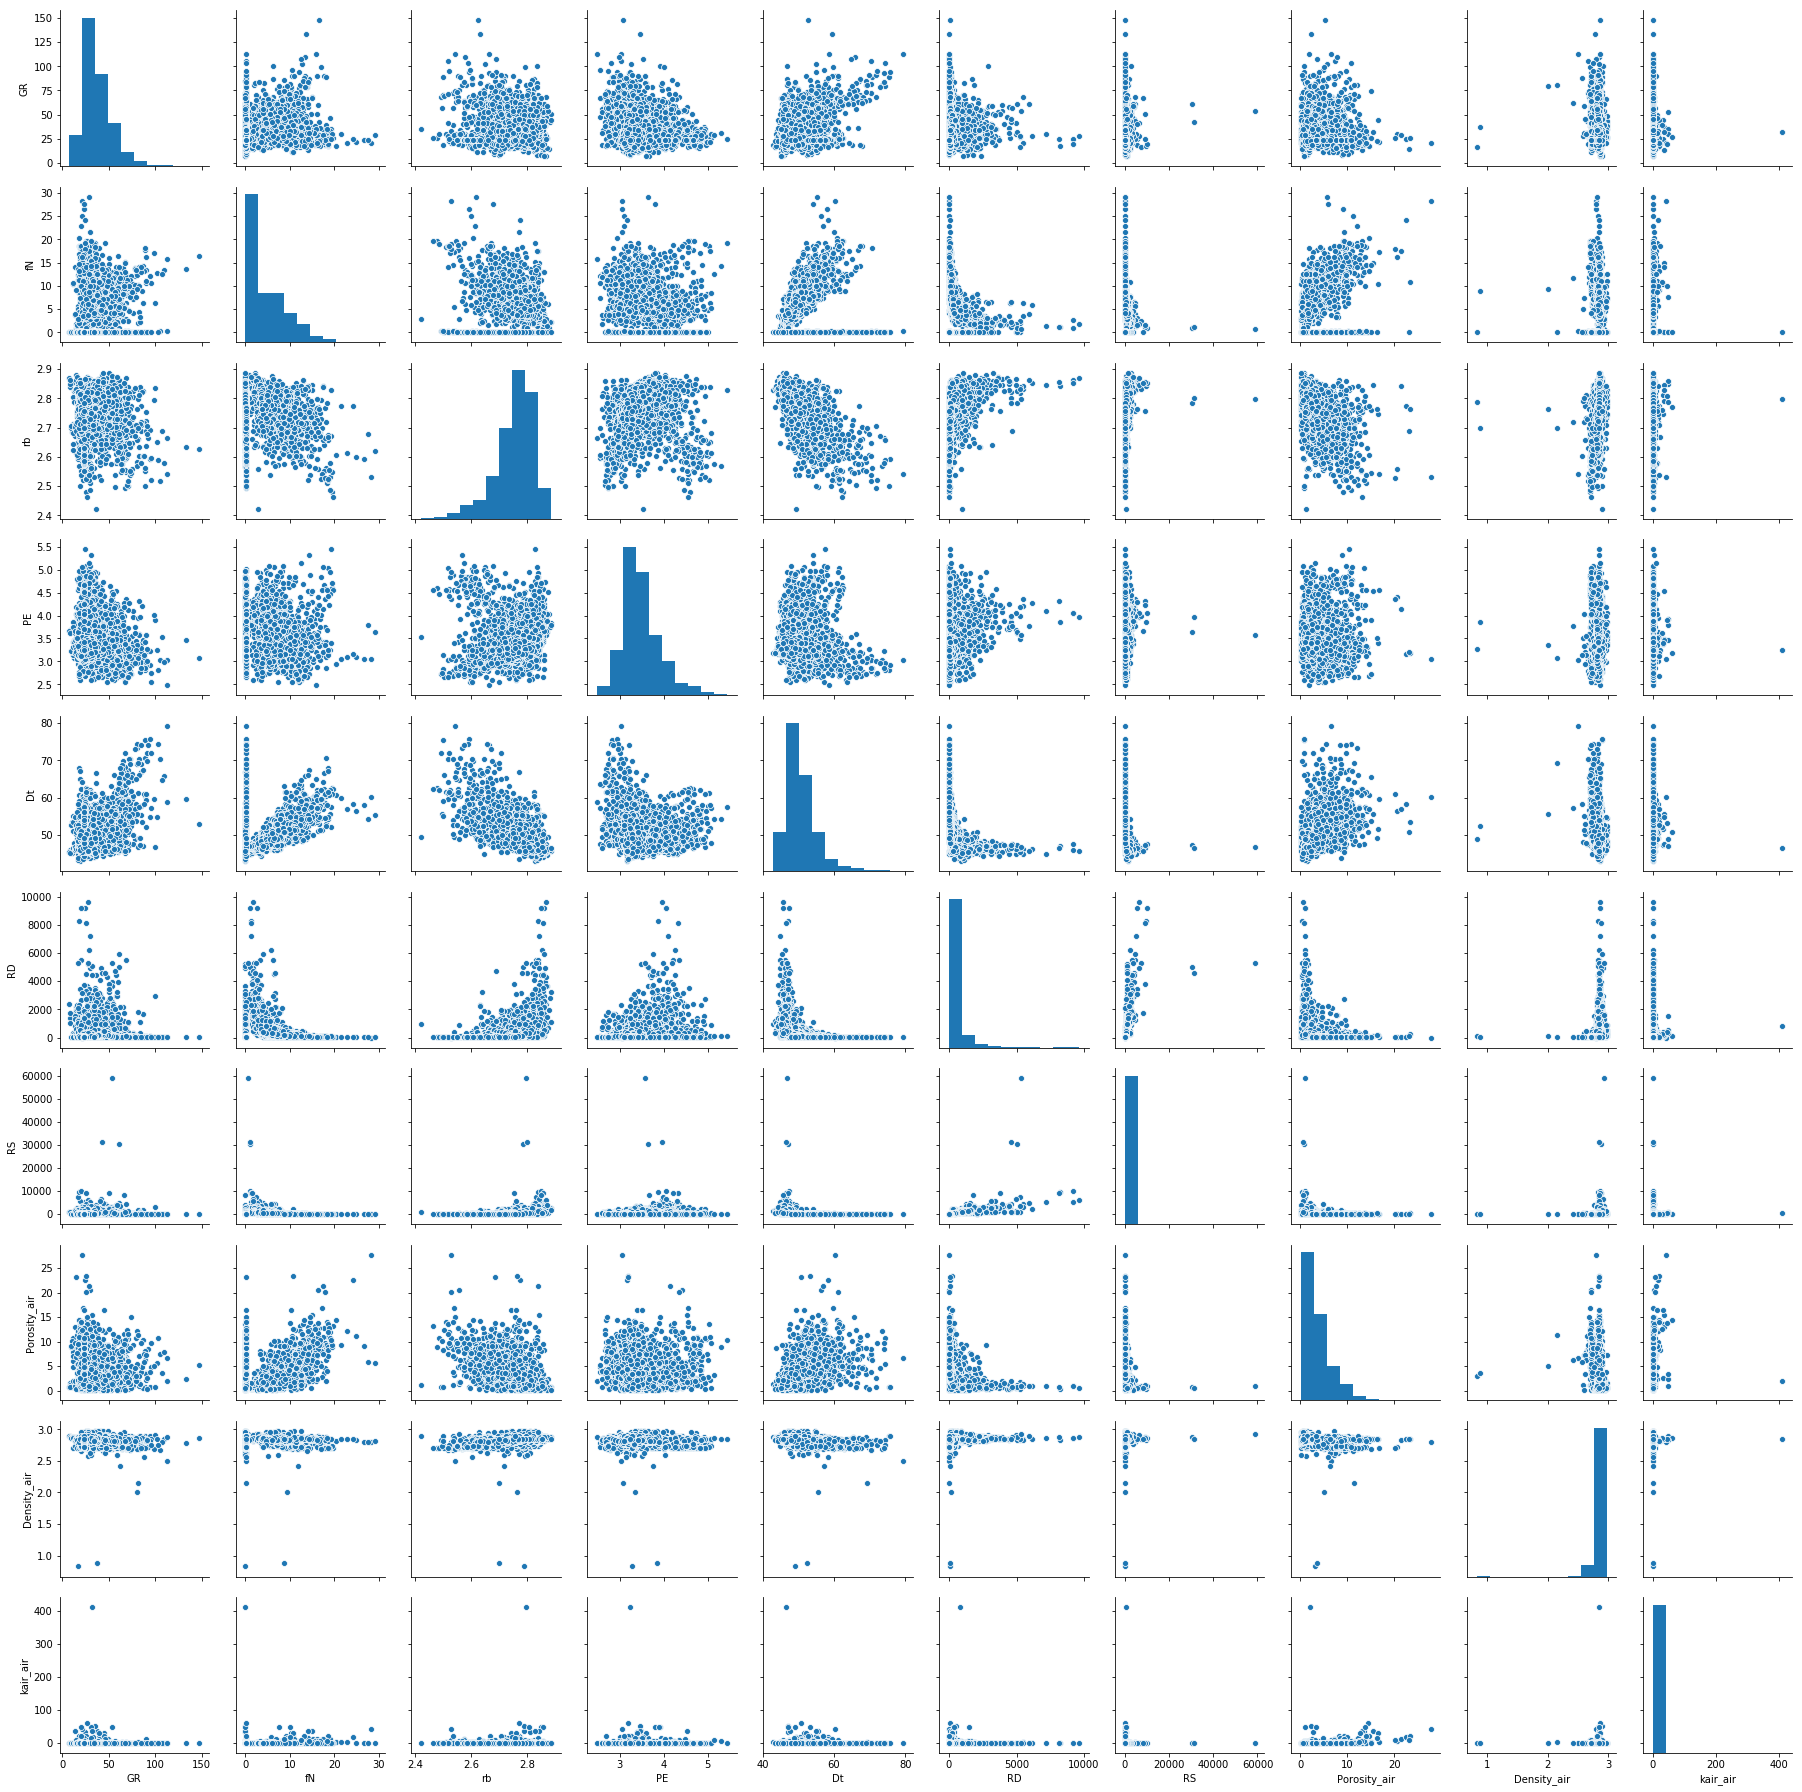

In [243]:
#pairPlot
sns.pairplot(data_cd[[ 'GR', 'fN', 'rb', 'PE', 'Dt', 'RD', 'RS','Porosity_air', 'Density_air', 'kair_air']]) 

No handles with labels found to put in legend.


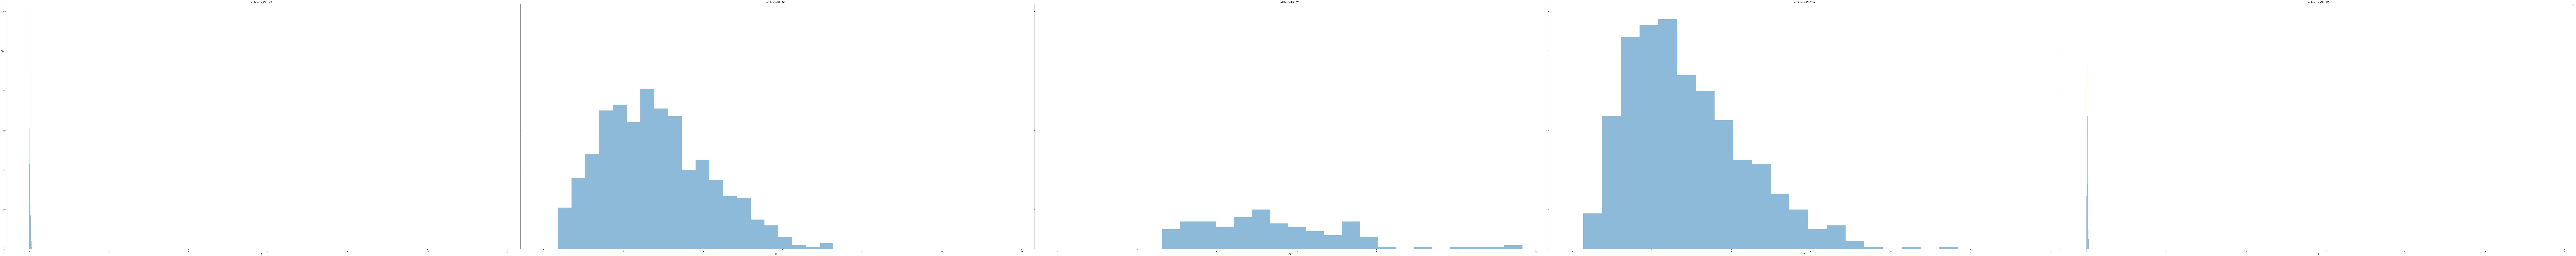

In [244]:
g = sns.FacetGrid(data_cd, col='wellName', palette=None, height=20, aspect=2)
g = g.map(plt.hist,'fN', bins=20, alpha=0.5)
plt.legend(loc='upper right')

In [245]:
data_cd.loc[np.in1d(data_cd.wellName, ['NRU_1509','NRU_1510']) , 'fN'] = 100* data_cd.loc[np.in1d(data_cd.wellName, ['NRU_1509','NRU_1510']) , 'fN']

In [246]:
ld.loc[np.in1d(ld.wellName, ['NRU_1509','NRU_1510']) , 'fN'] = 100* ld.loc[np.in1d(ld.wellName, ['NRU_1509','NRU_1510']) , 'fN']

In [247]:
#np.in1d('c', ['a','b'])

No handles with labels found to put in legend.


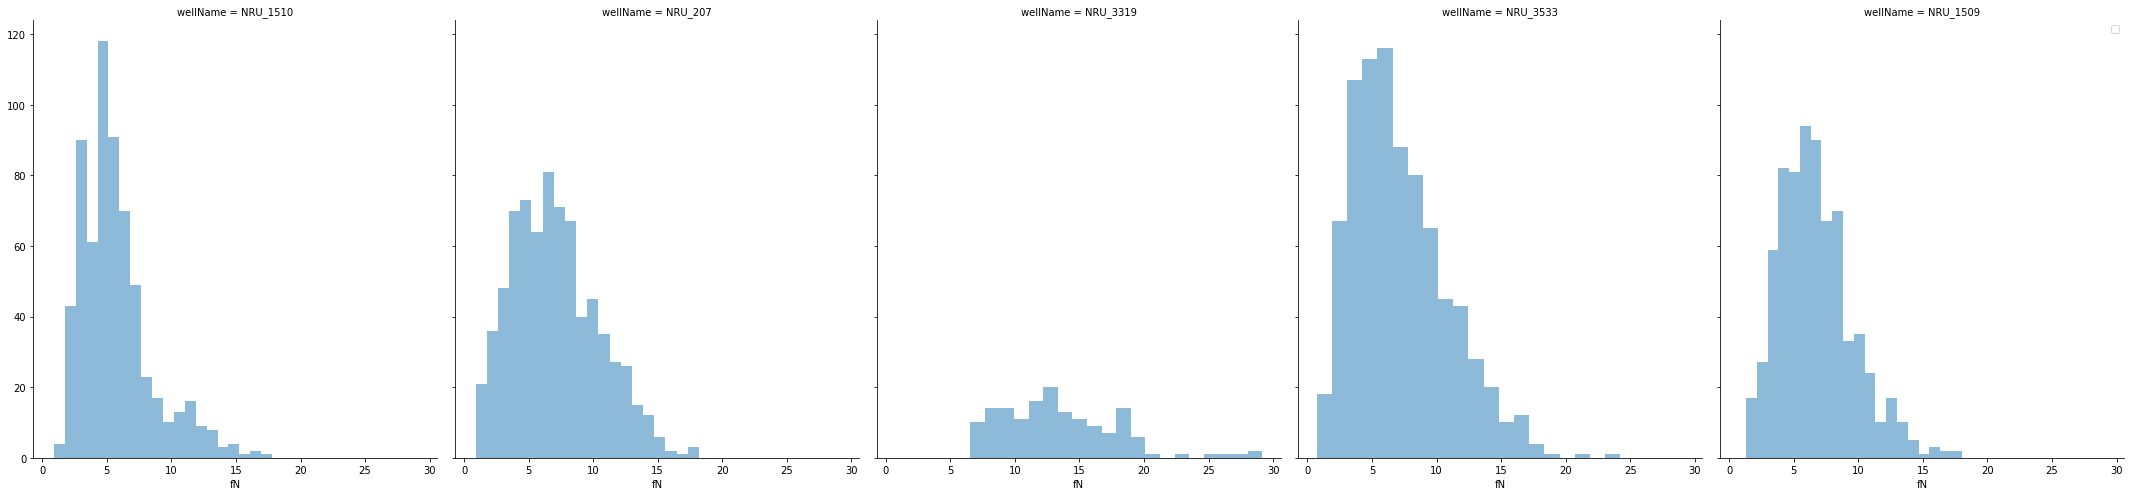

In [248]:
g = sns.FacetGrid(data_cd, col='wellName', palette=None, height=7, aspect=0.85)
g = g.map(plt.hist,'fN', bins=20, alpha=0.5)
plt.legend(loc='upper right')

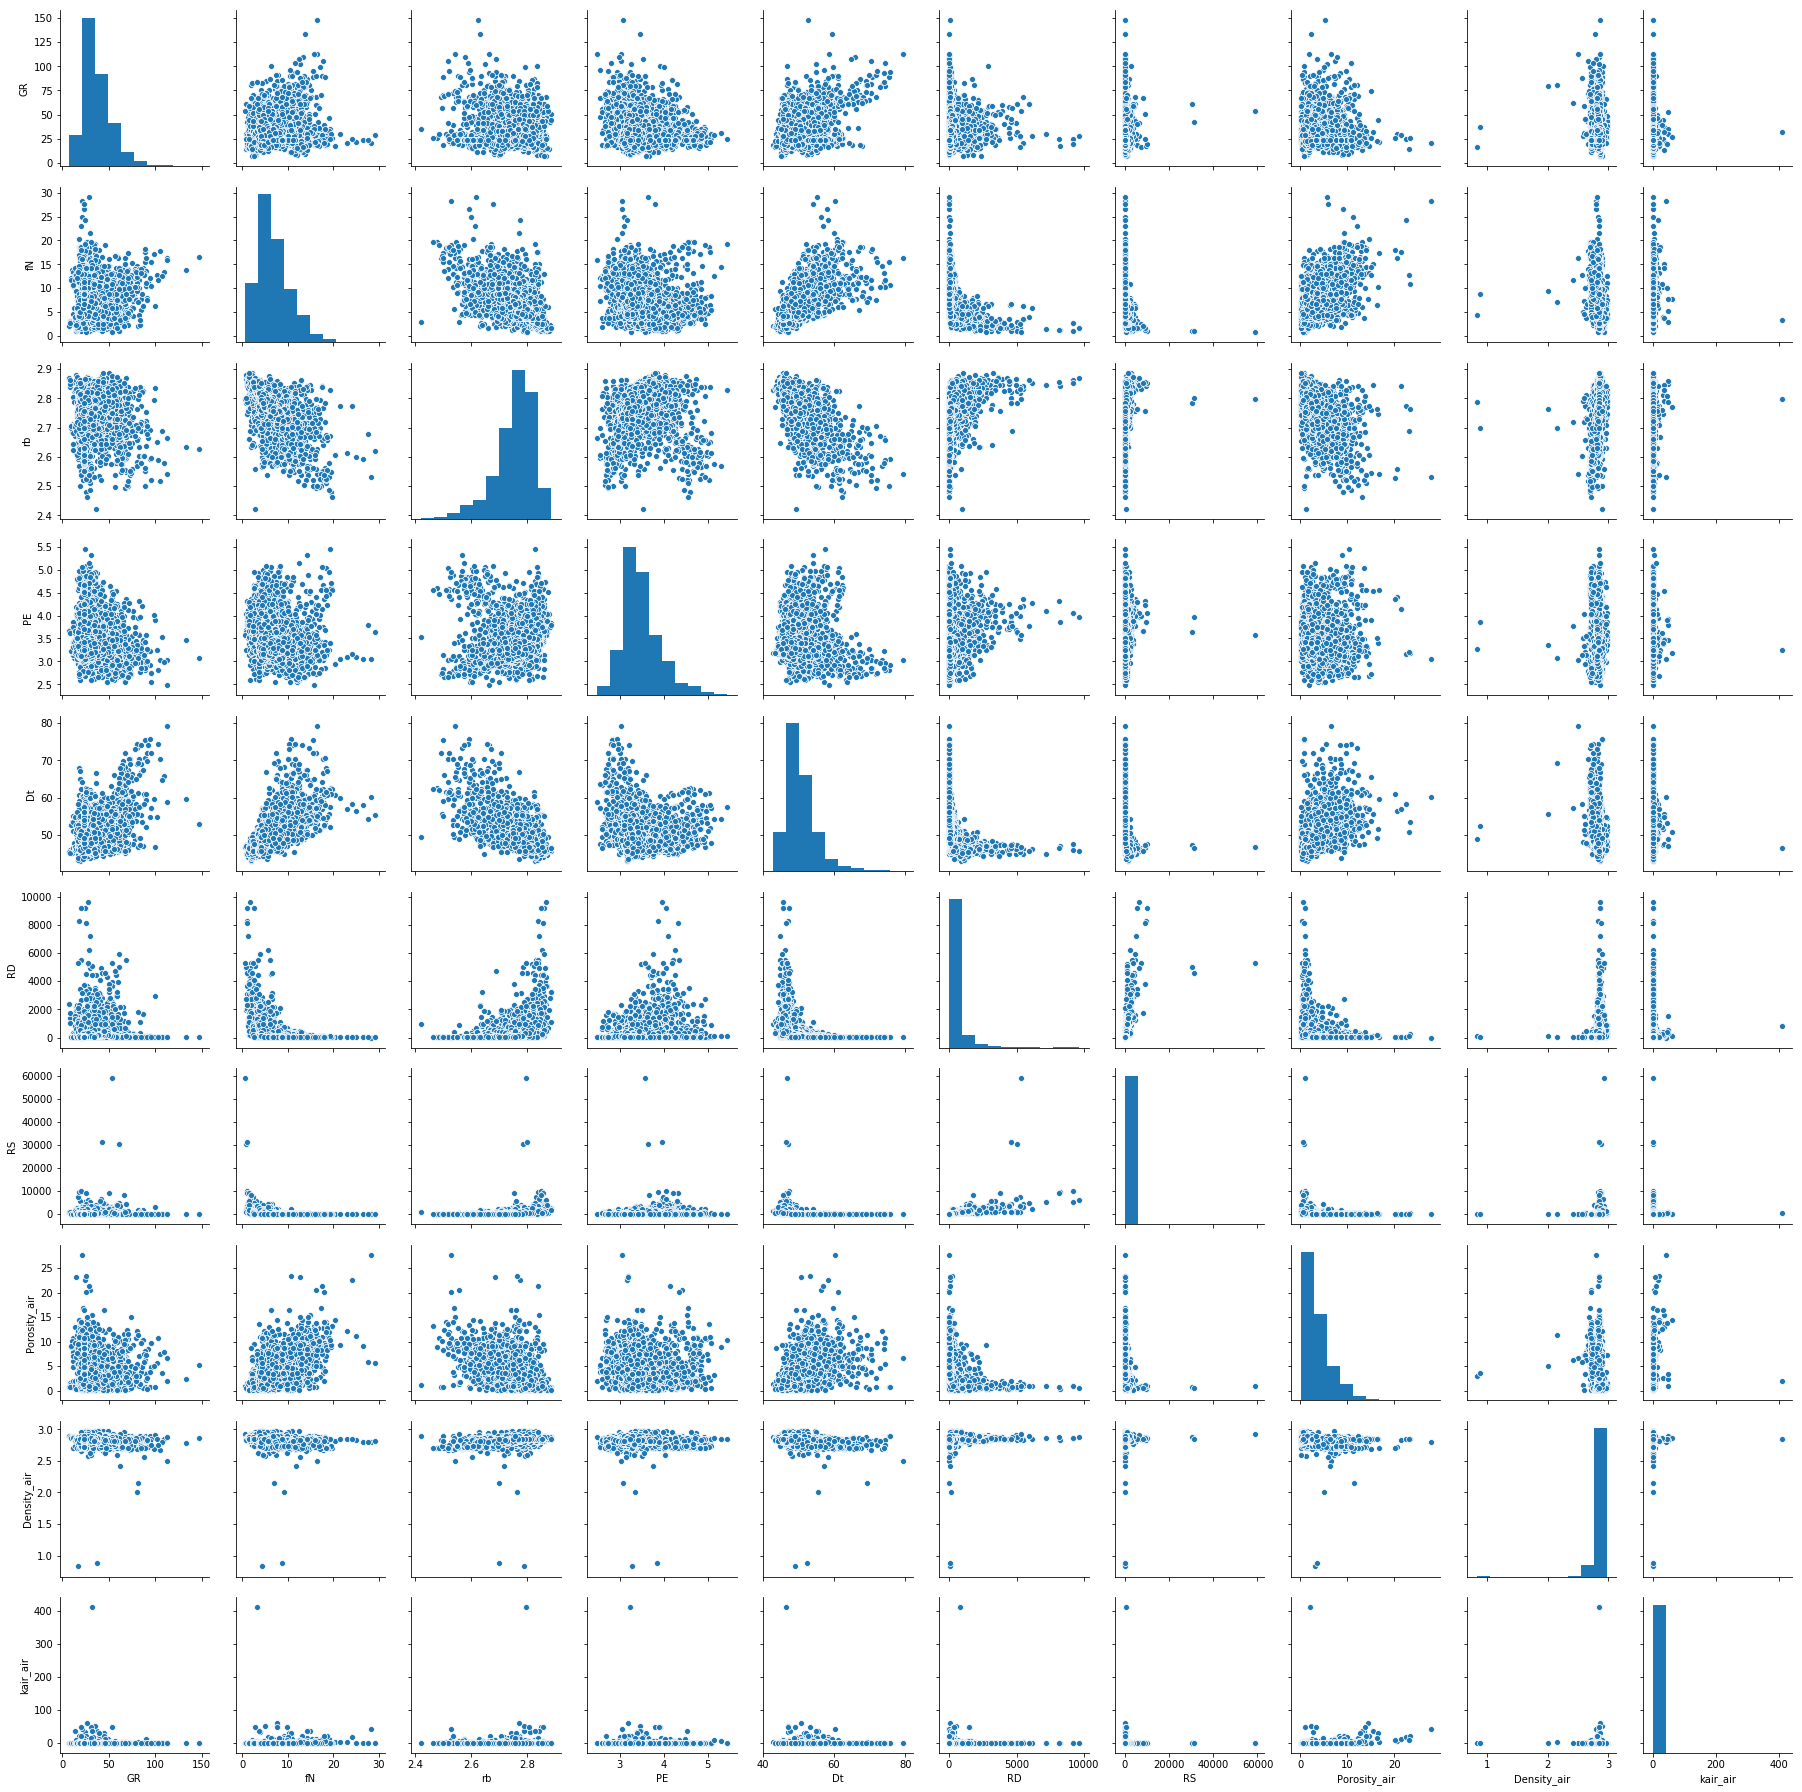

In [249]:
#pairPlot
sns.pairplot(data_cd[[ 'GR', 'fN', 'rb', 'PE', 'Dt', 'RD', 'RS','Porosity_air', 'Density_air', 'kair_air']] )

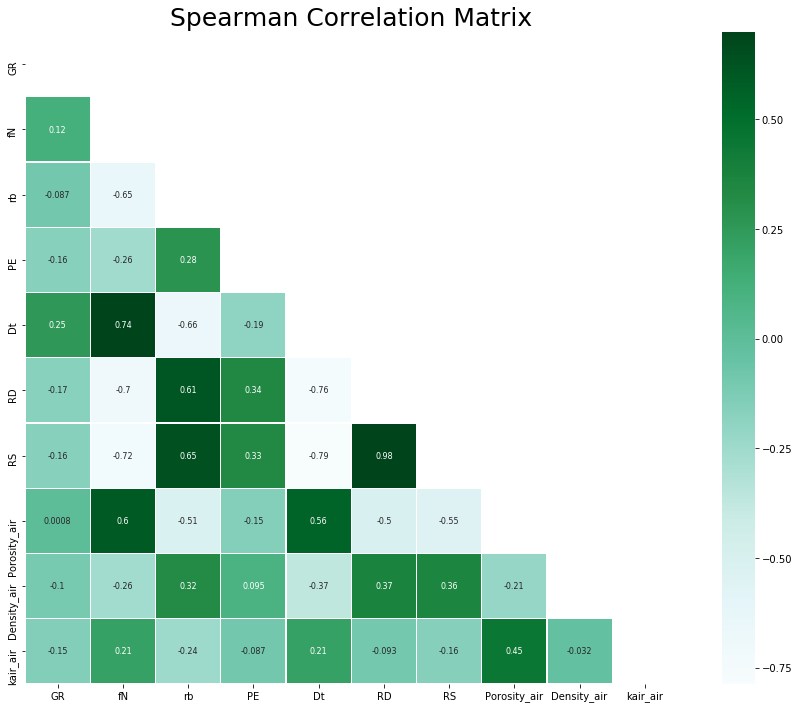

In [250]:
features = ['GR', 'fN', 'rb', 'PE', 'Dt', 'RD', 'RS', 
        'Porosity_air', 'Density_air', 'kair_air']

mask = np.zeros_like(data_cd[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Spearman Correlation Matrix',fontsize=25)

sns.heatmap(data_cd[features].corr('spearman'),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": 1});


## Well Log Visualization

A triple-combo display will be created in matplotlib in order to visualize the curves. The template will be incorporated into the triple combo_plot function dependent on the selection of top and bottom depths of the graph.

The triple combo display will consist in:

First track: GR, SP, CALI
Second track: Resistivities
Third Track: Density, Sonic and Neutronic
In the next code lines, we will set the template.

## Create the figure and subplots

In [251]:
ld.columns

Index(['wellName', 'Depth', 'GR', 'fN', 'rb', 'PE', 'Dt', 'RD', 'RS', 'RGRD',
       'Caliper', 'RSFL', 'RMLL'],
      dtype='object')

In [252]:
data_cd.columns

Index(['wellName', 'Depth', 'GR', 'fN', 'rb', 'PE', 'Dt', 'RD', 'RS',
       'Porosity_air', 'Density_air', 'kair_air'],
      dtype='object')

In [253]:
import cufflinks as cf

from plotly.offline import download_plotlyjs
from plotly.offline import init_notebook_mode
from plotly.offline import plot, iplot

init_notebook_mode(connected=True)

In [254]:
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)



In [255]:
#data_cd_all = data_cd
data_cd_well = data_cd[data_cd.wellName == 'NRU_1509']
def triple_combo_plot(top_depth,bottom_depth):
    
    logs=data_cd_well[(data_cd_well.Depth >= top_depth) & (data_cd_well.Depth <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,10), sharey=True)
    fig.suptitle("Well Composite", fontsize=22)
    fig.subplots_adjust(top=0.75,wspace=0.1)

#General setting for all axis
    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
       
    
#1st track: GR, CALI track
      
    
    #ax02=ax[0].twiny()
    #ax02.set_xlim(6,36)
   # ax02.plot(data_cd.Caliper, data_cd.Depth, '--', label='CALN[in]', color='black') 
    #ax02.spines['top'].set_position(('outward',40))
   # ax02.set_xlabel('CALI[in]',color='black')    
   # ax02.tick_params(axis='x', colors='black')
    
    ax03=ax[0].twiny()
    ax03.set_xlim(0,150)
    ax03.plot(data_cd_well.GR, data_cd_well.Depth, label='GR[api]', color='green') 
    ax03.spines['top'].set_position(('outward',80))
    ax03.set_xlabel('GR[api]',color='green')    
    ax03.tick_params(axis='x', colors='green')
    
    
 #2nd track: Resistivities

    ax11=ax[1].twiny()
    ax11.set_xlim(1,10000)
    ax11.set_xscale('log')
    ax11.grid(True)
    ax11.spines['top'].set_position(('outward',80))
    ax11.set_xlabel('RD[m.ohm]', color='red')
    ax11.plot(data_cd_well.RD, data_cd_well.Depth, label='RD[m.ohm]', color='red')
    ax11.tick_params(axis='x', colors='red')    
    ax12=ax[1].twiny()
    ax12.set_xlim(1,10000)
    ax12.set_xscale('log')
    ax12.plot(data_cd_well.RS, data_cd_well.Depth, label='RS[m.ohm]', color='purple') 
    ax12.spines['top'].set_position(('outward',40))
    ax12.set_xlabel('RS[m.ohm]', color='purple')    
    ax12.tick_params(axis='x', colors='purple')
    
   


 #3rd track: DT, RHOB, NPHI , Porosity_air (core) track
    
    ax21=ax[2].twiny()
    ax21.grid(True)
    ax21.set_xlim(140,40)
    ax21.spines['top'].set_position(('outward',0))
    ax21.set_xlabel('Dt[us/ft]')
    ax21.plot(data_cd_well.Dt, data_cd_well.Depth, label='DT[us/ft]', color='blue')
    ax21.set_xlabel('Dt[us/ft]', color='blue')    
    ax21.tick_params(axis='x', colors='blue')
    
    ax22=ax[2].twiny()
    ax22.set_xlim(-15,45)
    ax22.invert_xaxis()
    ax22.plot(data_cd_well.fN, data_cd_well.Depth, label='Nf[%]', color='green') 
    ax22.plot(data_cd_well.Porosity_air, data_cd_well.Depth ,label='Porosity_air[v/v]', color='green', marker = 'o',
            linestyle = 'None', markersize=2.5) 
    ax22.spines['top'].set_position(('outward',40))
    ax22.set_xlabel('fN[%]', color='green')    
    ax22.tick_params(axis='x', colors='green')
    
    ax23=ax[2].twiny()
    ax23.set_xlim(1.95,2.95)
    ax23.plot(data_cd_well.rb, data_cd_well.Depth ,label='rb[g/cc]', color='red') 
    ax23.spines['top'].set_position(('outward',80))
    ax23.set_xlabel('rb[g/cc]',color='red')
    ax23.tick_params(axis='x', colors='red')

  
    
    #data_cd[[]]
    #df2["Count"].iplot(kind="histogram", bins=20, theme="white", title="Passenger's Ages",xTitle='Ages', yTitle='Count')
    #data_cd.iplot() 
    

    #plt.savefig ('triple_combo_plot.png', dpi=200, format='png')

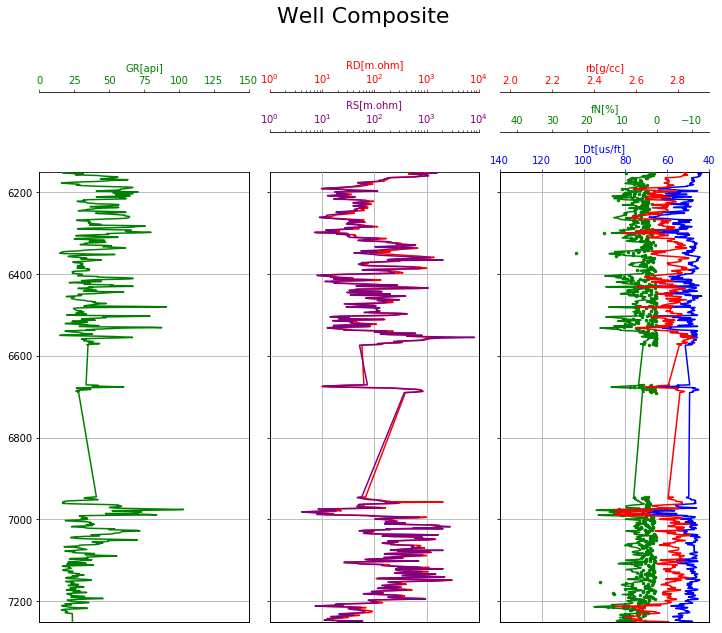

In [256]:
triple_combo_plot(data_cd_well.Depth.min(),data_cd_well.Depth.max())

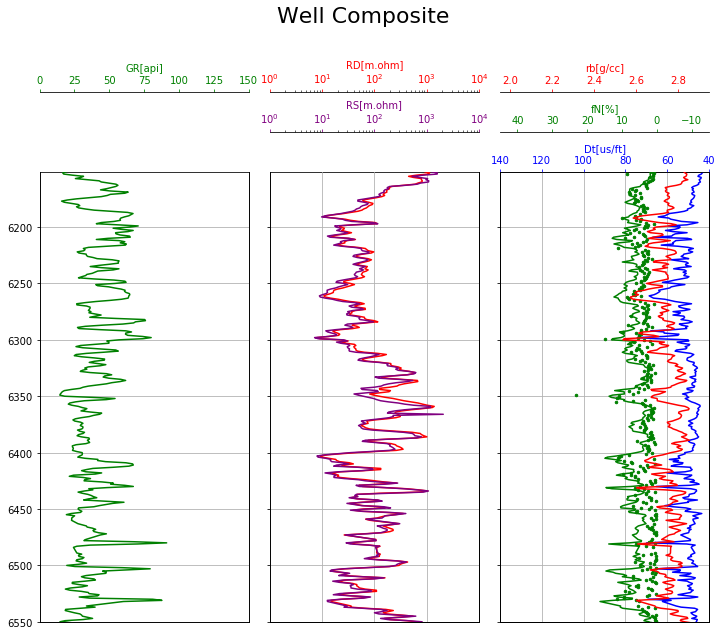

In [257]:
triple_combo_plot(data_cd_well.Depth.min(),6550)

In [258]:
data_cd.columns

Index(['wellName', 'Depth', 'GR', 'fN', 'rb', 'PE', 'Dt', 'RD', 'RS',
       'Porosity_air', 'Density_air', 'kair_air'],
      dtype='object')

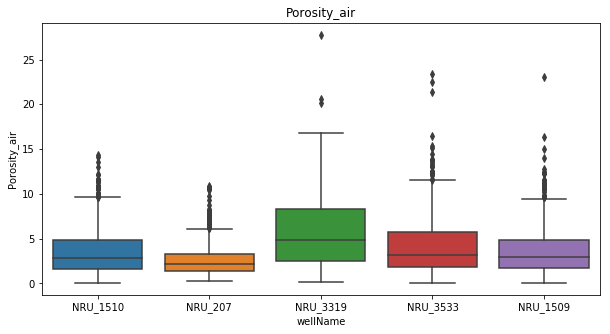

In [259]:
col_BoxPlt = ['Porosity_air']  #to be checked
for i in range(0,len(col_BoxPlt)):
    plt.subplots(figsize=(10, 5))
    plt.title(col_BoxPlt[i])
    sns.boxplot(x=data_cd[data_cd.columns[0]] , y=data_cd[col_BoxPlt[i]])
    plt.show()

## ML Study

## Regression Models (Porosity)

In [260]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [261]:
# train_test_split

x = data_cd[['GR', 'fN','rb','PE','Dt','RD','RS','wellName'] ]    # data_cd is product of merging log data and core data
y = data_cd['Porosity_air']


X_train_well, X_test_well, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=0)

X_train = X_train_well.drop(columns = ['wellName'])
X_test = X_test_well.drop(columns = ['wellName'])

In [262]:
data_cd.shape

(3076, 12)

In [263]:
model_all = [LinearRegression(), KNeighborsRegressor(n_neighbors =20), 
             RandomForestRegressor(n_estimators=500, random_state = 4),
             DecisionTreeRegressor(random_state = 5),SVR()]

txt_score = ['LinearRegression', 'Knn', 'RF', 'DT', 'SVR']

In [264]:
y_pred = pd.DataFrame(index=np.arange(X_test.shape[0]), columns = txt_score)
i = 0
model_R2= []
for model in model_all: 
    
    model.fit(X_train, y_train)
    y_pred.iloc[:,i] = model.predict(X_test)
    model_R2.append(r2_score(y_test, y_pred.iloc[:,i]))
    
    print("R2 score for", txt_score[i], ":" ,model_R2[i])
    i = i+1

R2 score for LinearRegression : 0.4732418410407111
R2 score for Knn : 0.34386650674205066
R2 score for RF : 0.49116459968858805
R2 score for DT : -0.1556617480097997
R2 score for SVR : -0.003038874998480212


In [265]:
y_pred['wellName']= X_test_well.reset_index()['wellName']
y_pred['Actual'] = y_test.reset_index().iloc[:,1]

In [266]:
def r2_rmse( g ):
    r2 = r2_score( g['Actual'], g['Predicted'] )    
    return   r2  

r2Well = pd.DataFrame(index=np.arange(len(y_pred['wellName'].unique())), columns = txt_score)
r2Well['wellName'] = y_pred['wellName'].unique()
i=0
for model in model_all_Reg: 
    y_pred['Predicted'] = y_pred[txt_score[i]]
    r2Well[txt_score[i]]  = y_pred.groupby( 'wellName').apply( r2_rmse ).reset_index().iloc[:,1]

    i = i+1

In [267]:
r2Well

,LinearRegression,Knn,RF,DT,SVR,wellName
0,0.499999,0.362097,0.477176,0.099627,0.034262,NRU_1509
1,0.284525,0.211362,0.334154,-0.160148,-0.024537,NRU_207
2,0.253600,0.259505,0.297516,-0.916387,0.038044,NRU_3533
3,0.717828,0.660547,0.710264,0.091874,-0.260090,NRU_1510
4,0.479713,0.193623,0.505353,-0.282602,-0.195328,NRU_3319


[Text(0, 0.5, 'R2'), Text(0.5, 0, 'Well Name')]

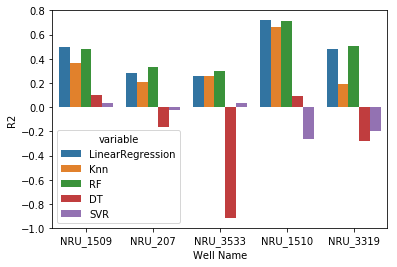

In [268]:
r2Well_melt = pd.melt(r2Well, id_vars=["wellName"])

# Plot.
fig = sns.barplot(x='wellName', y ='value', data = r2Well_melt, hue = 'variable')
fig.set(xlabel='Well Name', ylabel='R2')

Chaging RD and RS to log and repeating the procedure

In [269]:
x = data_cd[['wellName','GR', 'fN','rb','PE','Dt','RD','RS'] ]
x['RD']=np.log(x['RD'])
x['RS']=np.log(x['RS'])
y =data_cd['Porosity_air']
#y = preprocessing.normalize([y])

In [270]:
X_train_well, X_test_well, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=0)

X_train = X_train_well.drop(columns = ['wellName'])
X_test = X_test_well.drop(columns = ['wellName'])

In [271]:
model_all_Reg = [LinearRegression(), KNeighborsRegressor(n_neighbors = 20), 
             RandomForestRegressor(n_estimators=500, random_state = 4),
             DecisionTreeRegressor(random_state = 5),SVR()]

txt_score = ['LinearRegression', 'Knn', 'RF', 'DT', 'SVR']

In [272]:
X_test.shape[0]

616

In [273]:
y_pred = pd.DataFrame(index=np.arange(X_test.shape[0]), columns = txt_score)
i = 0
model_R2= []

for model in model_all_Reg: 
    
    model.fit(X_train, y_train)
    y_pred.iloc[:,i] = model.predict(X_test)
    model_R2.append(r2_score(y_test, y_pred.iloc[:,i]))
    
    print("R2 score for", txt_score[i], ":" ,model_R2[i])
    i = i+1


R2 score for LinearRegression : 0.4865268617685976
R2 score for Knn : 0.4506252142943814
R2 score for RF : 0.49125941769144454
R2 score for DT : -0.1569836261654829
R2 score for SVR : 0.35849811763491835


In [274]:
y_pred['wellName']= X_test_well.reset_index()['wellName']
y_pred['Actual'] = y_test.reset_index().iloc[:,1]


In [275]:
def r2_rmse( g ):
    r2 = r2_score( g['Actual'], g['Predicted'] )    
    return   r2  

r2Well = pd.DataFrame(index=np.arange(len(y_pred['wellName'].unique())), columns = txt_score)
r2Well['wellName'] = y_pred['wellName'].unique()
i=0
for model in model_all_Reg: 
    y_pred['Predicted'] = y_pred[txt_score[i]]
    r2Well[txt_score[i]]  = y_pred.groupby( 'wellName').apply( r2_rmse ).reset_index().iloc[:,1]

    i = i+1


In [276]:
r2Well

,LinearRegression,Knn,RF,DT,SVR,wellName
0,0.503492,0.438719,0.476333,0.105600,0.343146,NRU_1509
1,0.304907,0.304779,0.334026,-0.160148,0.323519,NRU_207
2,0.298321,0.223072,0.297121,-0.916373,0.186850,NRU_3533
3,0.719821,0.655894,0.711377,0.114578,0.243224,NRU_1510
4,0.485490,0.469582,0.506184,-0.298837,0.366111,NRU_3319


[Text(0, 0.5, 'R2'), Text(0.5, 0, 'Well Name')]

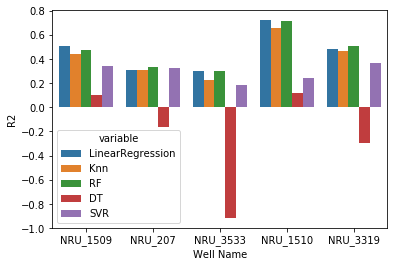

In [277]:
r2Well_melt = pd.melt(r2Well, id_vars=["wellName"])

# Plot.
fig = sns.barplot(x='wellName', y ='value', data = r2Well_melt, hue = 'variable')
fig.set(xlabel='Well Name', ylabel='R2')

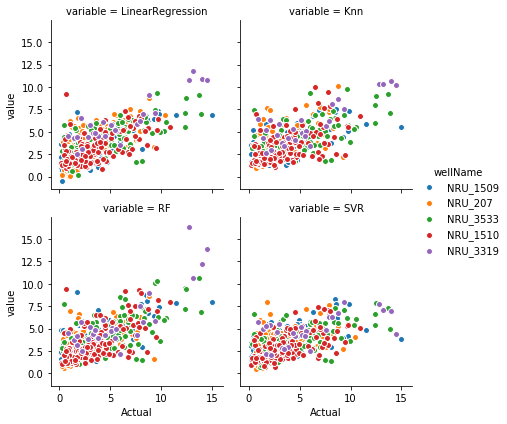

In [278]:
y_pred_melt = pd.melt(y_pred, id_vars=['Actual',"wellName"], value_vars=['LinearRegression', 'Knn', 'RF', 'SVR'])

#sns.lmplot( x="Actual", y=txt_score[0], data=y_pred, fit_reg=False, hue='wellName')

g = sns.FacetGrid(y_pred_melt, col="variable",  hue="wellName", col_wrap=2)
g = (g.map(plt.scatter, "Actual", "value", edgecolor="w").add_legend())


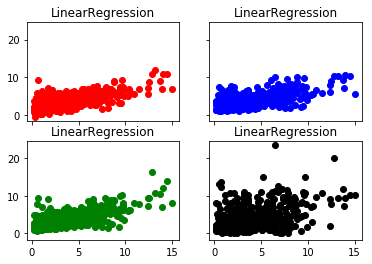

In [279]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)

i = 0
ax1.plot(y_test, y_pred.iloc[:,i], 'ro')  
ax1.title.set_text(txt_score[i])

ax2.plot(y_test, y_pred.iloc[:,1], 'bo')  
ax2.title.set_text(txt_score[i])

ax3.plot(y_test, y_pred.iloc[:,2], 'go') 
ax3.title.set_text(txt_score[i])

ax4.plot(y_test, y_pred.iloc[:,3], 'ko')  
ax4.title.set_text(txt_score[i])



plt.show()

## Deep Learning 
### ANN

In [280]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
import livelossplot

In [281]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [282]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [283]:
y_train.shape

(2460,)

In [284]:
# Initialising the ANN
model_ann = Sequential()

# Adding the input layer and the first hidden layer
#model.add(Dense(32, activation = 'relu', input_dim = 7))
model_ann.add(Dense(25, activation = 'relu', input_dim = 7))

# Adding the second hidden layer
model_ann.add(Dense(units = 25, activation = 'relu'))

# Adding the third hidden layer
#model_ann.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model_ann.add(Dense(units = 1, activation = 'linear'))

In [285]:
#model.add(Dense(1))
# Compiling the ANN
model_ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [286]:
from keras import metrics
model_ann.compile(loss='mse', optimizer='adam', metrics=[metrics.mean_squared_error, metrics.mean_absolute_error, 
                                                    metrics.mean_absolute_percentage_error, metrics.cosine_proximity])

In [287]:
# Fitting the ANN to the Training set
model_ann.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
2460/2460 [==============================] - 1s 542us/step - loss: 11.7679 - mean_squared_error: 11.7679 - mean_absolute_error: 2.3697 - mean_absolute_percentage_error: 89.3893 - cosine_proximity: -0.8309
Epoch 2/100
2460/2460 [==============================] - 1s 218us/step - loss: 5.4091 - mean_squared_error: 5.4091 - mean_absolute_error: 1.5811 - mean_absolute_percentage_error: 89.0893 - cosine_proximity: -1.0000
Epoch 3/100
2460/2460 [==============================] - 0s 171us/step - loss: 5.0476 - mean_squared_error: 5.0476 - mean_absolute_error: 1.5197 - mean_absolute_percentage_error: 87.2065 - cosine_proximity: -1.0000
Epoch 4/100
2460/2460 [==============================] - 1s 209us/step - loss: 4.8933 - mean_squared_error: 4.8933 - mean_absolute_error: 1.4970 - mean_absolute_percentage_error: 85.7920 - cosine_proximity: -1.0000
Epoch 5/100
2460/2460 [==============================] - 1s 220us/step - loss: 4.8576 - mean_squared_error: 4.8576 - mean_absolute_error: 

2460/2460 [==============================] - 1s 206us/step - loss: 3.9669 - mean_squared_error: 3.9669 - mean_absolute_error: 1.3689 - mean_absolute_percentage_error: 78.4768 - cosine_proximity: -1.0000
Epoch 76/100
2460/2460 [==============================] - 1s 218us/step - loss: 3.9246 - mean_squared_error: 3.9246 - mean_absolute_error: 1.3588 - mean_absolute_percentage_error: 77.1275 - cosine_proximity: -1.0000
Epoch 77/100
2460/2460 [==============================] - 1s 247us/step - loss: 3.9252 - mean_squared_error: 3.9252 - mean_absolute_error: 1.3623 - mean_absolute_percentage_error: 77.2327 - cosine_proximity: -1.0000
Epoch 78/100
2460/2460 [==============================] - 0s 175us/step - loss: 3.9463 - mean_squared_error: 3.9463 - mean_absolute_error: 1.3633 - mean_absolute_percentage_error: 78.6565 - cosine_proximity: -1.0000
Epoch 79/100
2460/2460 [==============================] - 0s 178us/step - loss: 3.9355 - mean_squared_error: 3.9355 - mean_absolute_error: 1.3596 - m

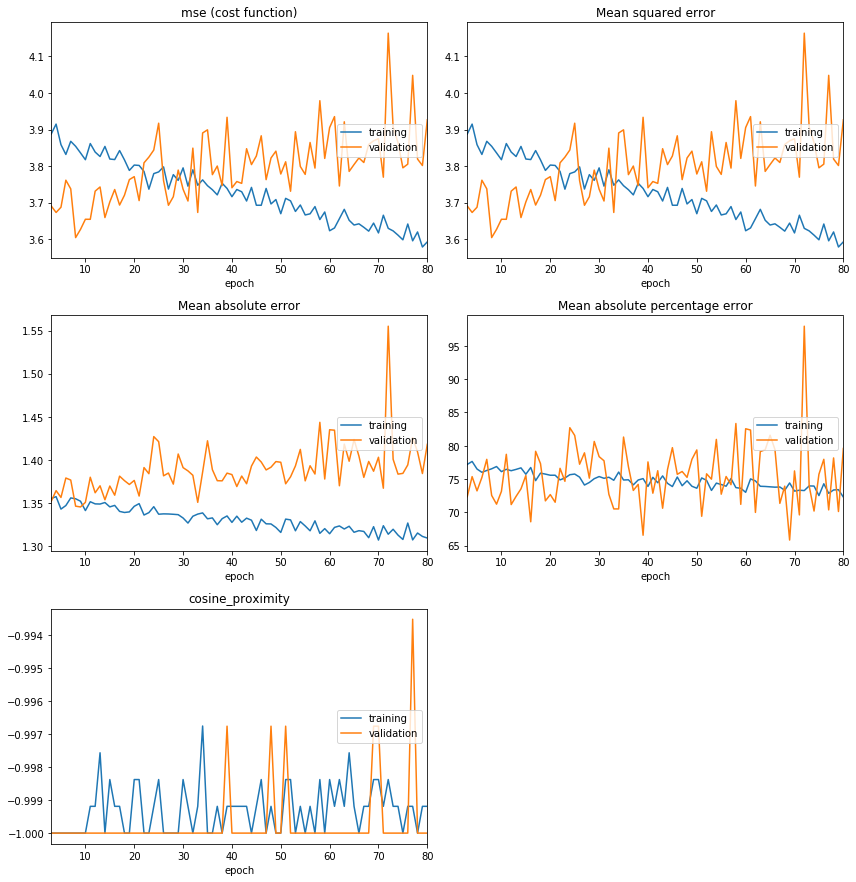

mse (cost function):
training   (min:    3.579, max:    3.966, cur:    3.593)
validation (min:    3.605, max:    4.164, cur:    3.927)

Mean squared error:
training   (min:    3.579, max:    3.966, cur:    3.593)
validation (min:    3.605, max:    4.164, cur:    3.927)

Mean absolute error:
training   (min:    1.307, max:    1.375, cur:    1.310)
validation (min:    1.346, max:    1.555, cur:    1.418)

Mean absolute percentage error:
training   (min:   72.292, max:   77.967, cur:   72.292)
validation (min:   65.838, max:   97.957, cur:   79.592)

cosine_proximity:
training   (min:   -1.000, max:   -0.997, cur:   -0.999)
validation (min:   -1.000, max:   -0.994, cur:   -1.000)


In [288]:
plot_losses = livelossplot.PlotLossesKeras()
model_ann.fit(X_train, y_train, 
                   batch_size = 5, 
                   callbacks = [plot_losses],
                   epochs = 80,
                   validation_data = (X_test, y_test)) # Less epochs - Basic Model

In [65]:
y_pred_ann = model_ann.predict(X_test)

In [66]:
model_ann.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                200       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 876
Trainable params: 876
Non-trainable params: 0
_________________________________________________________________


In [67]:
#model_ann.compile(loss='mse', optimizer='adam', metrics=['msle'])

In [68]:
model_R2_ann = (r2_score(y_test, y_pred_ann))
    
print("R2 score for ANN" ,model_R2_ann)
  

R2 score for ANN 0.4818277203912663


### Here different ML are applied to different arrangment of Data. Rock type is added to the core and log data!

In [73]:
data_rt1 = pd.merge(data_cd, rt,  how='inner', on=['wellName','Depth'])

In [74]:
data_rt1.head()

,wellName,Depth,GR,fN,rb,PE,Dt,RD,RS,Porosity_air,Density_air,kair_air,Rock Type
0,NRU_1510,6160,52.5,6.7,2.792,3.50,46.3,433.3,313.5,3.5,2.87,0.02,2
1,NRU_1510,6161,44.2,6.0,2.821,3.50,45.7,588.9,398.6,3.5,2.86,0.40,6
2,NRU_1510,6162,39.2,5.8,2.827,3.46,46.0,682.6,424.9,2.5,2.87,0.05,1
3,NRU_1510,6163,44.2,5.7,2.827,3.42,46.1,825.3,479.7,2.5,2.86,0.12,1
4,NRU_1510,6164,58.3,5.5,2.819,3.33,45.7,860.6,493.0,2.4,2.86,0.01,1


In [75]:
data_rt1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 237
Data columns (total 13 columns):
wellName        238 non-null object
Depth           238 non-null int64
GR              238 non-null float64
fN              238 non-null float64
rb              238 non-null float64
PE              238 non-null float64
Dt              238 non-null float64
RD              238 non-null float64
RS              238 non-null float64
Porosity_air    238 non-null float64
Density_air     238 non-null float64
kair_air        238 non-null float64
Rock Type       238 non-null int64
dtypes: float64(10), int64(2), object(1)
memory usage: 26.0+ KB


In [76]:
x_rt1 = data_rt1[['GR', 'fN','rb','PE','Dt','RD','RS'] ]

y_rt1 = data_rt1['Porosity_air']

In [77]:
x_rt1= data_rt1[['GR', 'fN','rb','PE','Dt','RD','RS'] ]
x_rt1['RD']=np.log(x_rt1['RD'])
x_rt1['RS']=np.log(x_rt1['RS'])
y_rt1 = data_rt1['Porosity_air']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_rt1,
                                                    y_rt1,
                                                    test_size=0.2, 
                                                    random_state=0)

In [79]:
model_all_rt1 = [LinearRegression(), KNeighborsRegressor(n_neighbors = 18), 
             RandomForestRegressor(n_estimators=500, random_state = 4),
             DecisionTreeRegressor(random_state = 5),SVR()]

txt_score = ['LinearRegression', 'Knn', 'RF', 'DT', 'SVR']

In [80]:
y_pred_rt1 = pd.DataFrame(index=np.arange(X_test.shape[0]), columns = txt_score)

In [81]:
i = 0
for model in model_all_rt1: 
    
    model.fit(X_train, y_train)
    y_pred_rt1.iloc[:,i] = model.predict(X_test)
    model_R2_rt1 = (r2_score(y_test, y_pred_rt1.iloc[:,i]))
    
    print("R2 score for", txt_score[i], ":" ,model_R2_rt1)
    i = i+1

R2 score for LinearRegression : 0.47393238234626733
R2 score for Knn : 0.40514122753271575
R2 score for RF : 0.38225815911707905
R2 score for DT : -0.09342097317479814
R2 score for SVR : 0.20634882178394587


In [82]:
x_rt2= data_rt1[['GR', 'fN','rb','PE','Dt','RD','RS', 'Rock Type'] ]
x_rt2['Rock Type'] = x_rt2['Rock Type'].apply(str)
x_rt2['RD']=np.log(x_rt2['RD'])
x_rt2['RS']=np.log(x_rt2['RS'])
y_rt2 = data_rt1['Porosity_air']

In [83]:
x_rt2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 237
Data columns (total 8 columns):
GR           238 non-null float64
fN           238 non-null float64
rb           238 non-null float64
PE           238 non-null float64
Dt           238 non-null float64
RD           238 non-null float64
RS           238 non-null float64
Rock Type    238 non-null object
dtypes: float64(7), object(1)
memory usage: 16.7+ KB


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_rt2,
                                                    y_rt2,
                                                    test_size=0.2, 
                                                    random_state=0)

In [85]:
model_all_rt2 = [LinearRegression(), KNeighborsRegressor(n_neighbors = 18), 
             RandomForestRegressor(n_estimators=500, random_state = 4),
             DecisionTreeRegressor(random_state = 5),SVR()]

txt_score = ['LinearRegression', 'Knn', 'RF', 'DT', 'SVR']

In [86]:
y_pred_rt2 = pd.DataFrame(index=np.arange(X_test.shape[0]), columns = txt_score)

In [87]:
i = 0
for model in model_all_rt2: 
    
    model.fit(X_train, y_train)
    y_pred_rt2.iloc[:,i] = model.predict(X_test)
    model_R2_rt2 = (r2_score(y_test, y_pred_rt2.iloc[:,i]))
    
    print("R2 score for", txt_score[i], ":" ,model_R2_rt2)
    i = i+1

R2 score for LinearRegression : 0.46648734900829003
R2 score for Knn : 0.42807606365324047
R2 score for RF : 0.3901526403985969
R2 score for DT : -0.031338885539733186
R2 score for SVR : 0.20171224512417052


## Classification Models

###  Rock Type

In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [89]:
data_rt.groupby(['wellName']).count() 

,Depth,GR,fN,rb,PE,Dt,RD,RS,Rock Type
wellName,,,,,,,,,
NRU_1509,38,38,38,38,38,38,38,38,38
NRU_1510,40,40,40,40,40,40,40,40,40
NRU_207,323,323,323,323,323,323,323,323,323
NRU_3319,40,40,40,40,40,40,40,40,40
NRU_3533,117,117,117,117,117,117,117,117,117


In [90]:
data_rt.columns

Index(['wellName', 'Depth', 'GR', 'fN', 'rb', 'PE', 'Dt', 'RD', 'RS',
       'Rock Type'],
      dtype='object')

In [91]:
data_rt.groupby(['Rock Type']).count()

,wellName,Depth,GR,fN,rb,PE,Dt,RD,RS
Rock Type,,,,,,,,,
1,78,78,78,78,78,78,78,78,78
2,161,161,161,161,161,161,161,161,161
3,30,30,30,30,30,30,30,30,30
4,26,26,26,26,26,26,26,26,26
5,27,27,27,27,27,27,27,27,27
6,206,206,206,206,206,206,206,206,206
7,30,30,30,30,30,30,30,30,30


In [92]:
from sklearn.model_selection import train_test_split
x = data_rt.drop(['Rock Type', 'Depth'],1)          #Features
y = data_rt ['Rock Type'].values # Target variable
x_train_well,x_test_well, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)
x_train = x_train_well.drop(columns = ['wellName'])
x_test= x_test_well.drop(columns = ['wellName'])                                                          
x_train.head()

,GR,fN,rb,PE,Dt,RD,RS
182,29.0,3.8,2.829,3.75,46.5,481.4,434.0
89,27.6,7.5,2.750,3.53,48.5,473.1,450.9
185,22.1,9.9,2.733,4.01,50.4,283.3,236.6
148,30.3,8.0,2.796,3.49,48.7,204.3,174.4
204,44.9,9.7,2.822,3.34,48.8,766.7,380.7


In [93]:
#Scaling the data
from sklearn import preprocessing
x_train_scaled = preprocessing.scale(x_train)
#print(x_train_scaled)
#print (X_train_scaled)

In [94]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.metrics import accuracy_score


In [150]:
model_all_Class = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 3), 
                   DecisionTreeClassifier(random_state = 5),
                   RandomForestClassifier(n_estimators=500, random_state = 4)]
txt_score = ['LogR', 'KnnC', 'DTC', 'RFC']

In [151]:
y_pred_cl = pd.DataFrame(index=np.arange(x_test.shape[0]), columns = txt_score)

i = 0
for model in model_all_Class: 
    
    model.fit(x_train, y_train)
    y_pred_cl.iloc[:,i] = model.predict(x_test)
    model_Acc = (accuracy_score(y_test, y_pred_cl.iloc[:,i]))
    
    print("Accuracy for", txt_score[i], ":" ,model_Acc)
    i = i+1

Accuracy for LogR : 0.5892857142857143
Accuracy for KnnC : 0.7053571428571429
Accuracy for DTC : 0.6785714285714286
Accuracy for RFC : 0.7321428571428571


In [152]:
from sklearn.metrics import confusion_matrix

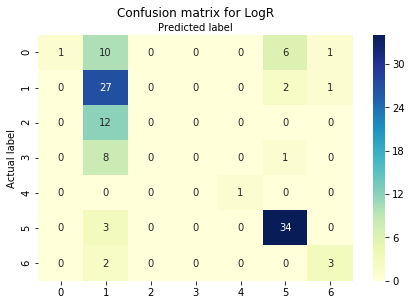

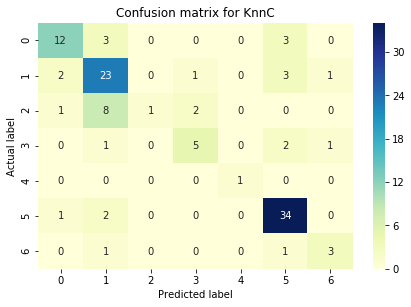

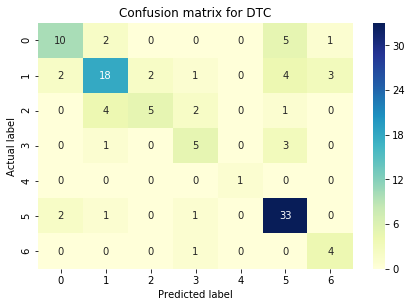

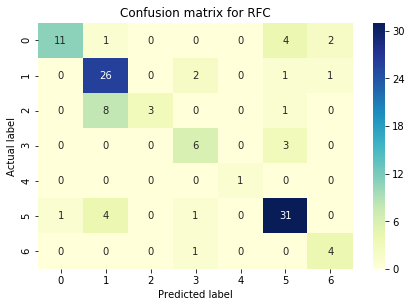

In [153]:
#Visualizing Confusion Matrix using Heatmap

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
i=0
for model in model_all_Class: 
    sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_cl[txt_score[i]])), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix for ' + txt_score[i], y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
    i=i+1

In [154]:
y_pred_cl['wellName']= x_test_well.reset_index()['wellName']
y_pred_cl['Actual'] = y_test

In [155]:
def Acc_well( g ):
    Acc_well = accuracy_score(g['Actual'], g['Predicted'])
    return   Acc_well  

AccWell = pd.DataFrame(index=np.arange(len(y_pred_cl['wellName'].unique())), columns = txt_score)
AccWell['wellName'] = y_pred_cl['wellName'].unique()
i=0
for model in model_all_Class: 
    y_pred_cl['Predicted'] = y_pred_cl[txt_score[i]]
    AccWell[txt_score[i]]  = y_pred_cl.groupby( 'wellName').apply( Acc_well ).reset_index().iloc[:,1]

    i = i+1

In [156]:
AccWell

,LogR,KnnC,DTC,RFC,wellName
0,0.600000,0.400000,0.400000,0.400000,NRU_207
1,0.400000,0.400000,0.400000,0.700000,NRU_3533
2,0.619048,0.793651,0.730159,0.746032,NRU_3319
3,0.363636,0.636364,0.727273,0.818182,NRU_1510
4,0.722222,0.777778,0.777778,0.833333,NRU_1509


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Well Name')]

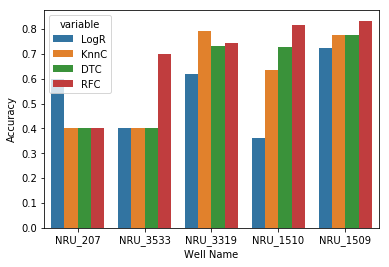

In [157]:
AccWell_melt = pd.melt(AccWell, id_vars=["wellName"])

# Plot.
fig = sns.barplot(x='wellName', y ='value', data = AccWell_melt, hue = 'variable')
fig.set(xlabel='Well Name', ylabel='Accuracy')

## Deep Learning

In [102]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [103]:
ann_classifier = Sequential()
ann_classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
ann_classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
ann_classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'softmax'))

In [104]:
ann_classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [105]:
from keras.utils import to_categorical
y_binary = to_categorical(y_train)
y_binary_test = to_categorical(y_test)

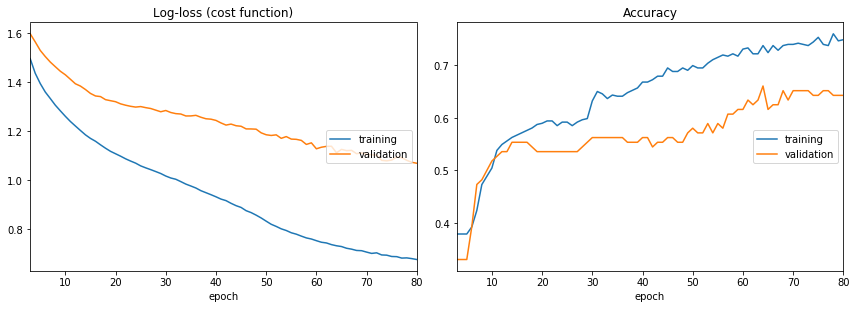

Log-loss (cost function):
training   (min:    0.675, max:    2.031, cur:    0.675)
validation (min:    1.068, max:    1.957, cur:    1.068)

Accuracy:
training   (min:    0.357, max:    0.760, cur:    0.749)
validation (min:    0.330, max:    0.661, cur:    0.643)


In [106]:
plot_losses = livelossplot.PlotLossesKeras()
ann_classifier.fit(x_train, y_binary, 
                   batch_size = 5, 
                   callbacks = [plot_losses],
                   epochs = 80,
                   validation_data = (x_test, y_binary_test)) # Less epochs - Basic Model
# Look at the loss curves, is the model overfitting?

In [107]:
ann_classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
ann_classifier.fit(x_train, y_binary, batch_size = 10, epochs = 200)

Epoch 1/200
446/446 [==============================] - 1s 1ms/step - loss: 0.6695 - acc: 0.7511
Epoch 2/200
446/446 [==============================] - 0s 320us/step - loss: 0.6649 - acc: 0.7601
Epoch 3/200
446/446 [==============================] - 0s 215us/step - loss: 0.6627 - acc: 0.7556
Epoch 4/200
446/446 [==============================] - 0s 228us/step - loss: 0.6650 - acc: 0.7601
Epoch 5/200
446/446 [==============================] - 0s 219us/step - loss: 0.6623 - acc: 0.7489
Epoch 6/200
446/446 [==============================] - 0s 230us/step - loss: 0.6618 - acc: 0.7601
Epoch 7/200
446/446 [==============================] - 0s 271us/step - loss: 0.6579 - acc: 0.7601
Epoch 8/200
446/446 [==============================] - 0s 212us/step - loss: 0.6546 - acc: 0.7646
Epoch 9/200
446/446 [==============================] - 0s 257us/step - loss: 0.6547 - acc: 0.7556
Epoch 10/200
446/446 [==============================] - 0s 212us/step - loss: 0.6580 - acc: 0.7511
Epoch 11/200
446/446 

446/446 [==============================] - 0s 295us/step - loss: 0.5184 - acc: 0.7960
Epoch 164/200
446/446 [==============================] - 0s 280us/step - loss: 0.5193 - acc: 0.7960
Epoch 165/200
446/446 [==============================] - 0s 338us/step - loss: 0.5176 - acc: 0.7960
Epoch 166/200
446/446 [==============================] - 0s 322us/step - loss: 0.5177 - acc: 0.7915
Epoch 167/200
446/446 [==============================] - 0s 264us/step - loss: 0.5167 - acc: 0.7937
Epoch 168/200
446/446 [==============================] - 0s 253us/step - loss: 0.5179 - acc: 0.7892
Epoch 169/200
446/446 [==============================] - 0s 212us/step - loss: 0.5171 - acc: 0.7982
Epoch 170/200
446/446 [==============================] - 0s 224us/step - loss: 0.5180 - acc: 0.7982
Epoch 171/200
446/446 [==============================] - 0s 250us/step - loss: 0.5154 - acc: 0.7982
Epoch 172/200
446/446 [==============================] - 0s 255us/step - loss: 0.5138 - acc: 0.7915
Epoch 173/200


In [108]:
ann_classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
Total params: 248
Trainable params: 248
Non-trainable params: 0
_________________________________________________________________


In [109]:
# accuracy using evaluate
loss, accuracy = ann_classifier.evaluate(x_test, y_binary_test)
print("Accuracy: ", accuracy)
print("Loss: " , loss)

112/112 [==============================] - 0s 1ms/step
Accuracy:  0.6964285714285714
Loss:  0.9818607568740845


In [110]:
y_pred_NN = ann_classifier.predict_proba(x_test)
#y_pred_NN = (y_pred > 0.5)
y_pred_krNN = pd.DataFrame(y_pred_NN).idxmax(axis=1) 


Text(0.5, 257.44, 'Predicted label')

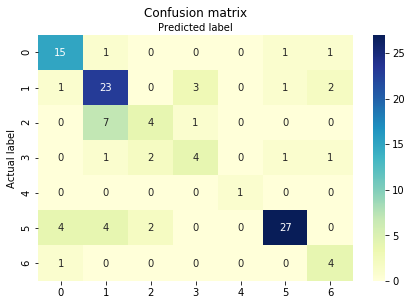

In [111]:
#Visualizing Confusion Matrix using Heatmap

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_krNN)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [112]:
# Accuracy    
crt_values = (y_pred_krNN == y_test).sum()
wrong_values = (y_pred_krNN != y_test).sum()
total = crt_values+wrong_values
result = crt_values/total
print(result) 

0.6964285714285714


# DONE!